### **Exploratory Data Analysis – V-features vs Class**

#### 1. Focus on V-features + Target
- Selected only **V1–V28** and `Class` for correlation analysis.  
- Computed correlation matrix to assess feature relationships.  

#### 2. Correlation with Class
- Extracted correlations of each V-feature with `Class`.  
- Most features show weak correlation (expected from PCA transformation).  
- **Top correlated features with Class:**  
  - `V17`, `V14`, `V12`, `V10`, `V16`, `V3`, `V7`, `V11`, `V4`, `V18`  
- These features are likely to be the **most predictive** in fraud detection.  

#### 3. Correlation Heatmap
- Heatmap of V-features + `Class`.  
- Features appear **largely uncorrelated with each other**, avoiding multicollinearity issues.  
- A few features stand out with stronger alignment to `Class`.  

#### 4. Distribution of Top Features
- Violin plots show **feature distribution differences** between fraud (`Class=1`) and non-fraud (`Class=0`).  
- Fraudulent transactions often exhibit **wider or shifted distributions** in features like `V17`, `V14`, `V12`, `V10`, `V16`.  
- Some features (e.g., `V4`, `V18`) show subtler but noticeable separation.  

---

### **Key Takeaways**
- Although individual correlations are modest, certain V-features provide **valuable separation** between fraud and legitimate transactions.  
- These features should be prioritized in **model training and feature importance analysis**.  
- Overall, V-features capture hidden structure from PCA and remain central to fraud detection modeling.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline


In [2]:
df = pd.read_csv("../data/raw/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Extract Hour from Time (convert seconds → hours)
df["Hour"] = (df["Time"] // 3600) % 24

# Log-transform Amount
df["Amount_log"] = np.log1p(df["Amount"])

# Drop original Time column (redundant now)
df = df.drop(columns=["Time"])

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,4.262539


### Feature Engineering
- Extracted **hour** from `Time` (in seconds).  
- Applied **log transform** to `Amount`.  
- Dropped the original `Time` column.  


In [ ]:
df.to_csv("../data/processed/creditcard_processed.csv", index=False)
print("✅ Processed dataset saved at data/processed/creditcard_processed.csv")

✅ Processed dataset saved at data/processed/creditcard_processed.csv


In [ ]:
# Focus only on V-features + Class
v_features = [col for col in df.columns if col.startswith("V")] + ["Class"]

corr_matrix = df[v_features].corr()

# Display correlation of each feature with Class
corr_with_class = corr_matrix["Class"].drop("Class").sort_values(key=np.abs, ascending=False)
corr_with_class.head(15)

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
V1    -0.101347
V9    -0.097733
V5    -0.094974
V2     0.091289
V6    -0.043643
Name: Class, dtype: float64

### Correlation with Target
- Selected only **V-features** along with `Class`.  
- Computed correlation matrix.  
- Sorted correlations of features with `Class` (top 15 shown).  

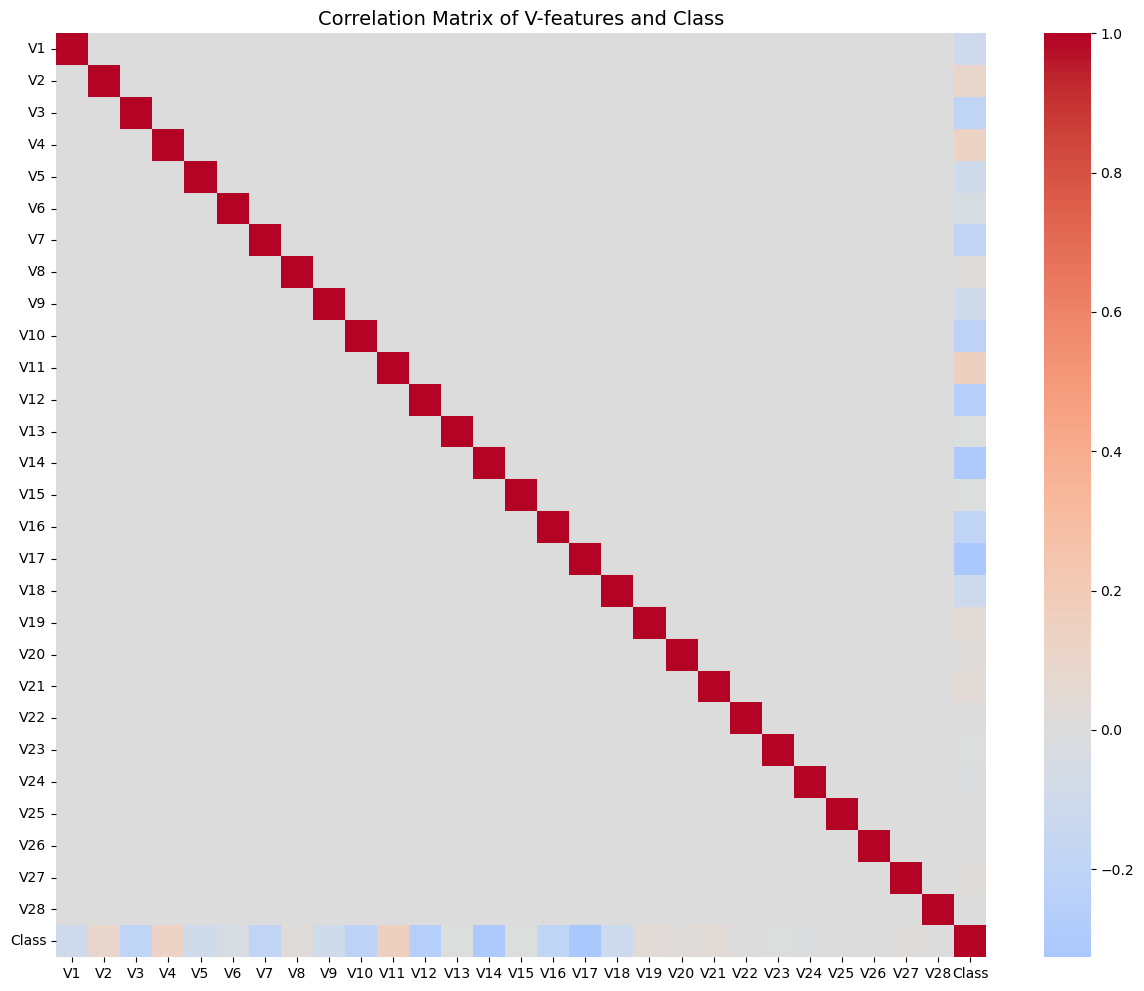

In [7]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Correlation Matrix of V-features and Class", fontsize=14)
plt.show()

In [8]:
top_features = corr_with_class.head(10).index.tolist()
print("Top correlated features with Class:\n", top_features)

Top correlated features with Class:
 ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']


### Correlation Matrix of V-features and Class
- Computed correlations of V1–V28 with the target `Class`.  
- Most features show **weak correlation** (expected from PCA transformation).  
- Some features stand out with stronger correlations to fraud.  

**Top correlated features with Class:**  
- `V17`, `V14`, `V12`, `V10`, `V16`, `V3`, `V7`, `V11`, `V4`, `V18`  

👉 These features may carry the **most predictive power** for fraud detection and are good candidates for further analysis/modeling.  

/tmp/ipykernel_10768/2328920338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class", y=feature, data=df, palette={'0': "skyblue", '1': "red"}, cut=0, scale="width")
/tmp/ipykernel_10768/2328920338.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="Class", y=feature, data=df, palette={'0': "skyblue", '1': "red"}, cut=0, scale="width")
/tmp/ipykernel_10768/2328920338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class", y=feature, data=df, palette={'0': "skyblue", '1': "red"}, cut=0, scale="width")
/tmp/ipykernel_10768/2328920338.py:5: FutureWarning: 

The 

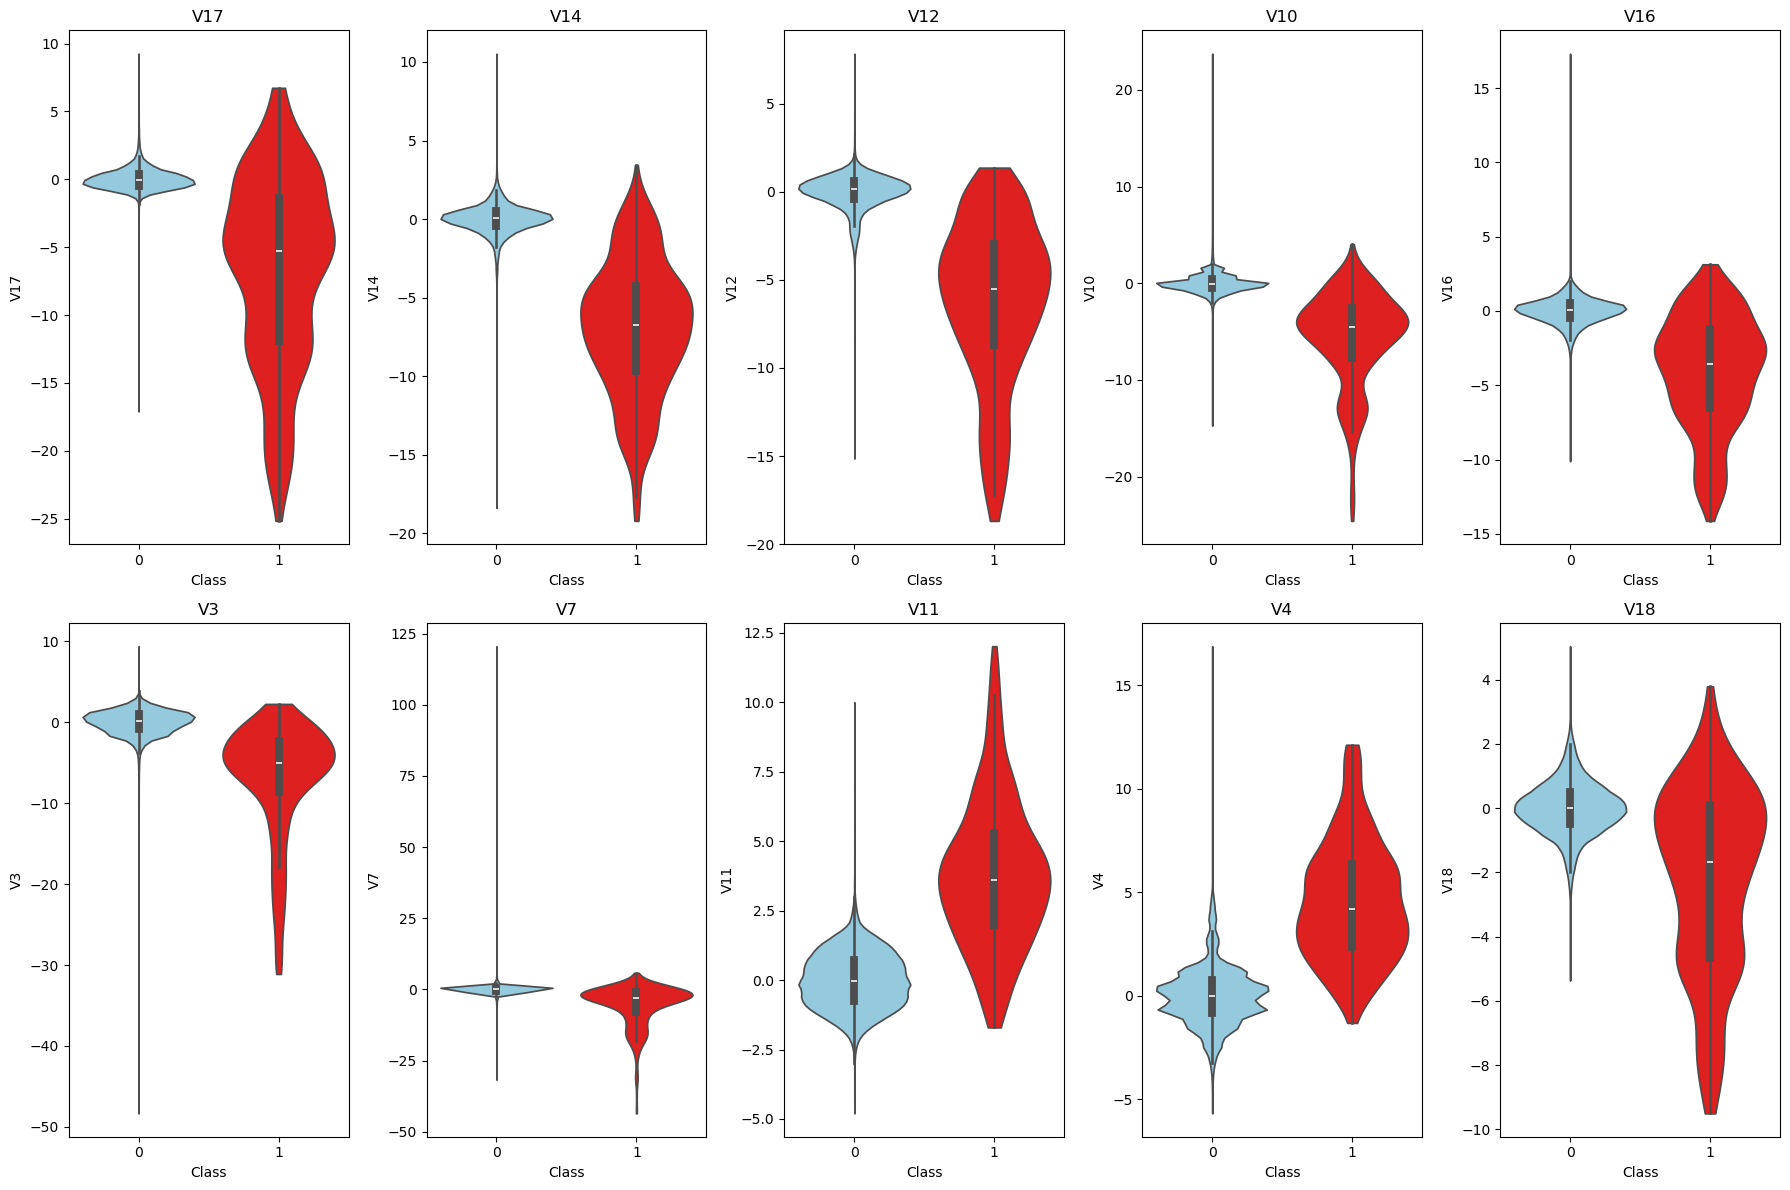

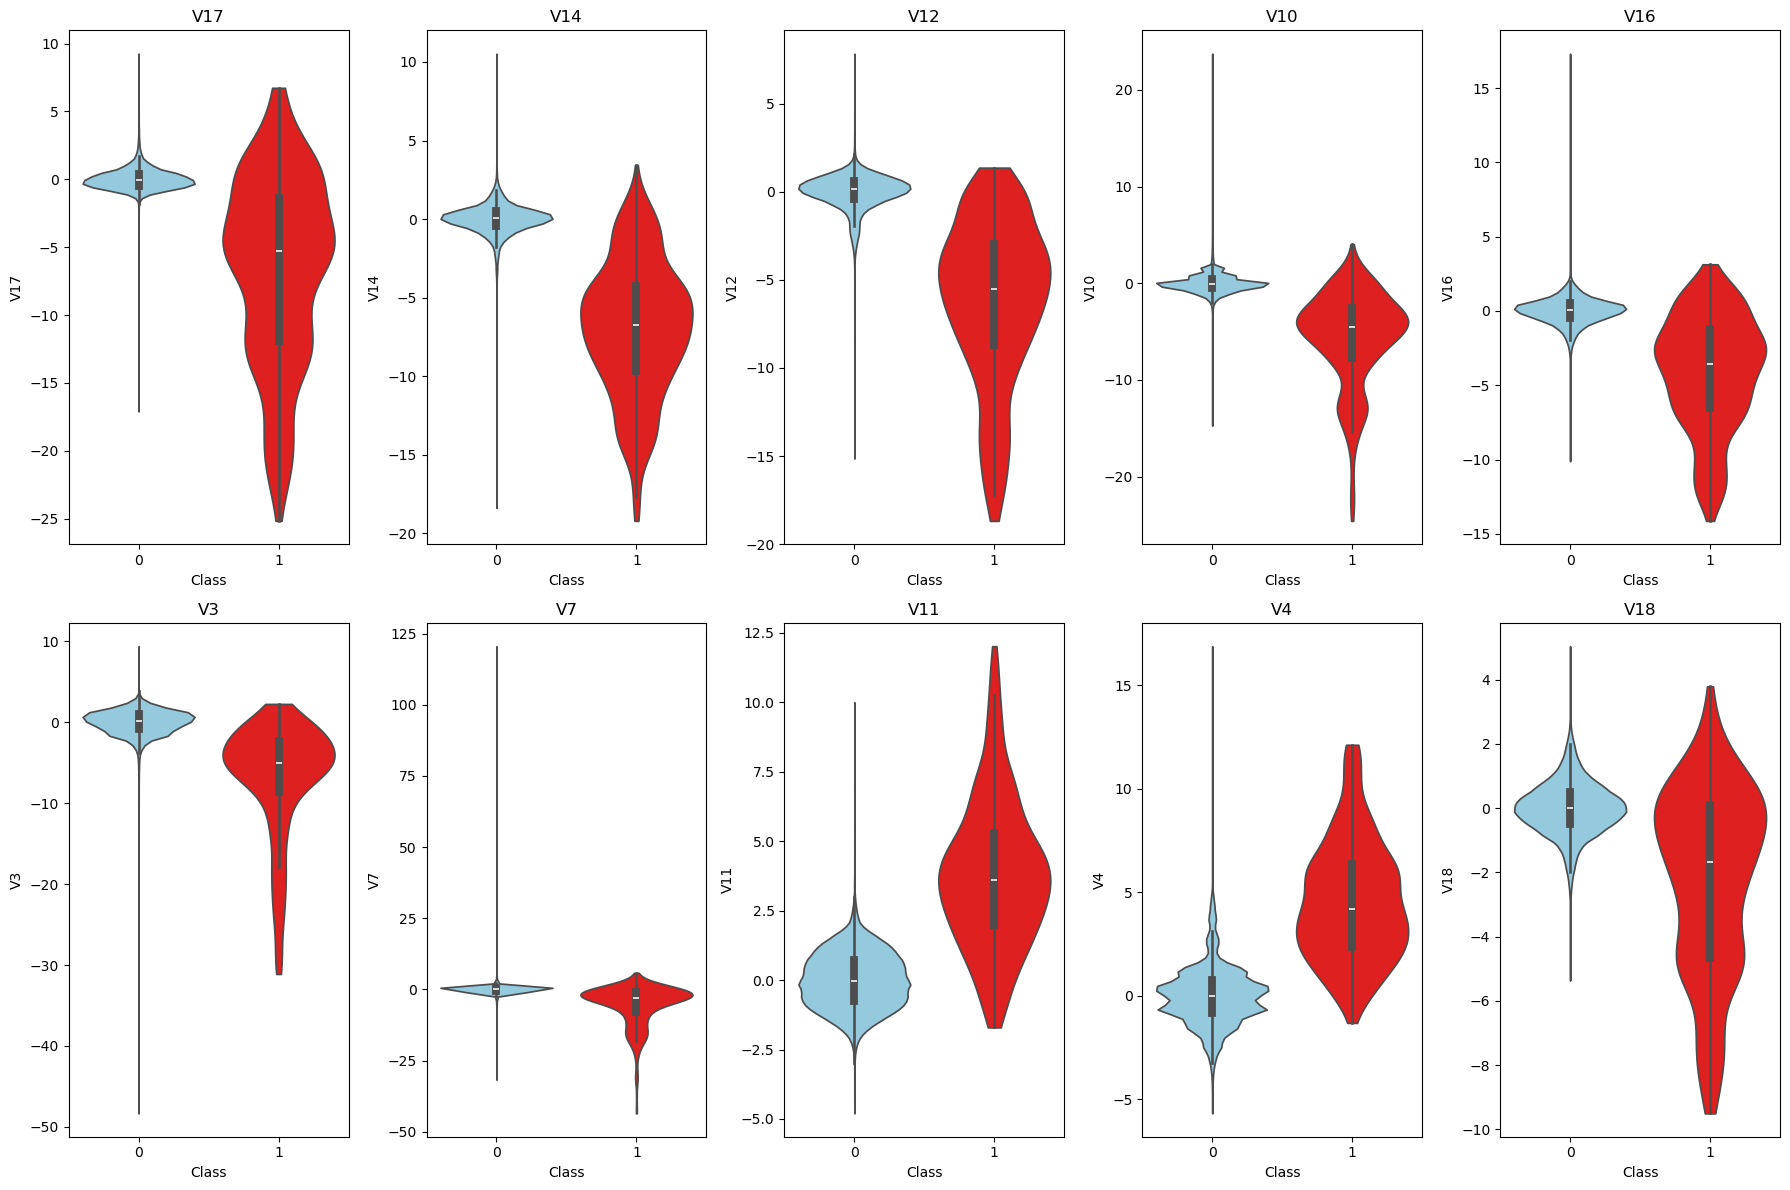

In [24]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 5, i)
    # Change the palette keys to strings '0' and '1'
    sns.violinplot(x="Class", y=feature, data=df, palette={'0': "skyblue", '1': "red"}, cut=0, scale="width")
    plt.title(feature)
plt.tight_layout()
plt.savefig("../reports/figures/top_vfeatures_violin.png", bbox_inches="tight")
plt.show()

### Distribution of Top V-features by Class
- Plotted violin plots for the **top 10 correlated features** with `Class`.  
- Fraud cases (`Class = 1`, red) often show **distinct distributions** compared to non-fraud (`Class = 0`, blue).  
- Features like **V17, V14, V12, V10, V16** exhibit clear separation between fraud and non-fraud.  
- Some features (e.g., V4, V18) show smaller but noticeable distributional shifts.  

👉 These differences indicate that these V-features capture meaningful variance between fraud and legitimate transactions, making them strong candidates for model training.  